

# Image Classifier

## Submission

This project implemented an Convolutional neural network program using TensorFlow. the goal for this project is to be able to recognize the shape of the hands that make up scissors, rock, or paper.

## Library

In [22]:
import numpy as np

# Unzipping filees
import zipfile
import shutil
import os

# load tensorflow library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

# load tensorflow layer library
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization

# visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#load file
from google.colab import files

## Resource

Here is the source to the project page for dataset that used in this project.

### import dataset

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-03 13:32:16--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.02MB/s    in 54s     

2020-07-03 13:33:11 (5.67 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



### Extract dataset

In [ ]:
dataset_raw = '/tmp/rockpaperscissors.zip'
zip = zipfile.ZipFile(dataset_raw, 'r')
zip.extractall('/tmp')
zip.close()

### Load dataset

#### input path

In [ ]:
data_path = '/tmp/rockpaperscissors/'
print(os.listdir(data_path))

['scissors', 'rps-cv-images', 'paper', 'rock', 'README_rpc-cv-images.txt']


remove redundant data

In [ ]:
shutil.rmtree('/tmp/rockpaperscissors/rps-cv-images')

In [ ]:
train_paper = os.path.join(data_path + 'paper')
train_rock = os.path.join(data_path + 'rock')
train_scissors = os.path.join(data_path + 'scissors')

### Visualizing the data

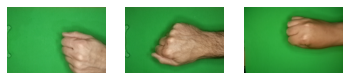

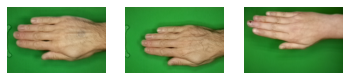

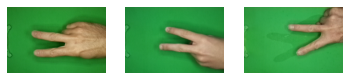

In [ ]:
n = 3
for f in [train_rock, train_paper, train_scissors]:
    for i in range(n):
        sp = plt.subplot(1, n, i + 1)
        sp.axis('Off')
        img = mpimg.imread(f + "/" + os.listdir(f)[i])
        plt.imshow(img)
    plt.show()

### extract n file for every folder and move it make a test set

in this project we delete 3 files in every folder (Rock, Paper, Scissors) so those files would not include in training and we can use them for prediction

In [ ]:
n = 1
for f in [train_rock, train_paper, train_scissors]:
    for i in range(n):
      print(f + "/" + os.listdir(f)[i])
      os.remove(f + "/" + os.listdir(f)[i])

/tmp/rockpaperscissors/rock/IR0TvCNLcK7IrE1a.png
/tmp/rockpaperscissors/paper/qRNjm8INtwezm9Yd.png
/tmp/rockpaperscissors/scissors/1yDUM1w2HTbuPIfO.png


## Image Preprocessing

image Processing and Augmentation with ImageDataGenerator for spliting train and validation data. 

for this dataset we use ratio 80/20 for train dan validation data 

### Image Data Generator

In [ ]:
idg = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,       
    height_shift_range=.2,
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.2)

### Spliting dataset

spliting dataset to train and validation data.

In [ ]:
size_1 = 150
size_2 = 150

In [ ]:
train_gen = idg.flow_from_directory(
        data_path,
        target_size=(size_1, size_2),
        batch_size=10,
        class_mode='categorical',
        subset='training'
        )

val_gen = idg.flow_from_directory(
        data_path,
        target_size=(size_1, size_2),
        batch_size=10,
        class_mode='categorical',
        subset='validation'
        )

Found 1749 images belonging to 3 classes.
Found 436 images belonging to 3 classes.


## CNN Modeling

### create model

this model consists of 3 layer CNN with relu activation, 1 dropout layer with batchNormalization layer, 1 flatten layer with dropout layer and 2 Dense layer with relu and softmax activation

In [ ]:
# build sequential model 
model = Sequential()

# 1st layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(size_1, size_2, 3))) #convolutional layer
model.add(MaxPooling2D(2, 2)) #pooling layer
# 2nd layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
# 3rd layer
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
# 4rd layer
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
# fattening layer
model.add(Flatten())
model.add(Dropout(0.5)) #dropout layer to prevent overfitting
# 1st dense layer
model.add(Dense(512, activation='relu'))
# 2nd dense layer
model.add(Dense(3, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### Compiling model

In [ ]:
model.compile(
    loss = 'categorical_crossentropy', 
    optimizer='rmsprop', 
    metrics=['accuracy'])

### Training the model

In [ ]:
%%time

result = model.fit(
            train_gen,
            steps_per_epoch=25,
            epochs=20,
            validation_data=val_gen,
            validation_steps=5,
            verbose=1)

Epoch 1/20
25/25 [==============================] - 14s 543ms/step - loss: 1.3380 - accuracy: 0.3760 - val_loss: 1.1122 - val_accuracy: 0.3200
Epoch 2/20
25/25 [==============================] - 13s 533ms/step - loss: 1.1319 - accuracy: 0.3855 - val_loss: 1.0761 - val_accuracy: 0.5800
Epoch 3/20
25/25 [==============================] - 14s 540ms/step - loss: 1.1142 - accuracy: 0.3960 - val_loss: 1.0559 - val_accuracy: 0.4200
Epoch 4/20
25/25 [==============================] - 14s 541ms/step - loss: 1.0364 - accuracy: 0.5320 - val_loss: 0.7190 - val_accuracy: 0.6600
Epoch 5/20
25/25 [==============================] - 13s 539ms/step - loss: 0.6720 - accuracy: 0.7200 - val_loss: 0.5725 - val_accuracy: 0.8000
Epoch 6/20
25/25 [==============================] - 14s 542ms/step - loss: 0.6449 - accuracy: 0.7560 - val_loss: 0.5929 - val_accuracy: 0.8200
Epoch 7/20
25/25 [==============================] - 13s 538ms/step - loss: 0.5063 - accuracy: 0.8072 - val_loss: 0.6686 - val_accuracy: 0.8000

### plot history

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

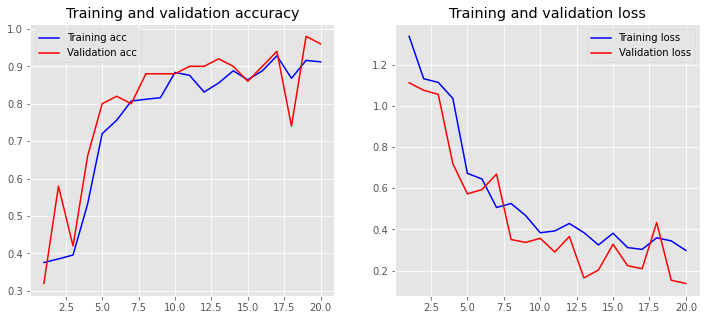

In [ ]:
plt.style.use('ggplot')
plot_history(result)

## Make a prediction

we will upload 3 images that we remove from training set from previous step and we use them for predict our model.


/tmp/rockpaperscissors/rock/IR0TvCNLcK7IrE1a.png (rename as rock.png)

/tmp/rockpaperscissors/paper/qRNjm8INtwezm9Yd.png
(rename as paper.png)

/tmp/rockpaperscissors/scissors/1yDUM1w2HTbuPIfO.png
(rename as scissors.png)

Saving paper.png to paper (6).png
Saving rock.png to rock (6).png
Saving scissors.png to scissors (6).png
------------------------------------------------------------


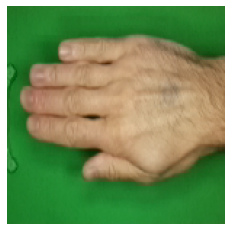



paper.png
[1. 0. 0.]
this image is a paper gesture
------------------------------------------------------------
------------------------------------------------------------


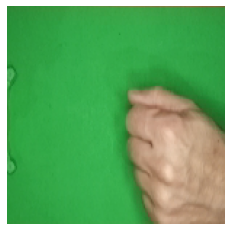



rock.png
[2.2610831e-18 1.0000000e+00 0.0000000e+00]
this image is a rock gesture
------------------------------------------------------------
------------------------------------------------------------


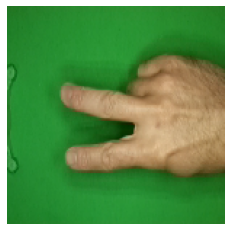



scissors.png
[0. 0. 1.]
this image is a scissors gesture
------------------------------------------------------------


In [42]:
uploaded = files.upload()

for fn in uploaded.keys():
  print("------------------------------------------------------------")
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  sp = plt.subplot()
  sp.axis('Off')
  # img = mpimg.imread(f + "/" + os.listdir(f)[i])
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print("\n")
  print(fn)
  print(classes[0])
  if (classes[0][0] > classes[0][1] and classes[0][0] > classes[0][2]):
    print('this image is a paper gesture')
  if (classes[0][1] > classes[0][0] and classes[0][1] > classes[0][2]):
    print('this image is a rock gesture')
  if (classes[0][2] > classes[0][0] and classes[0][2] > classes[0][1]):
    print('this image is a scissors gesture')
  print("------------------------------------------------------------")